# Analysing Global Protests and Democracy since 1990

## Introduction
This project will explore a set of two datasets related to protest and democracy. This project aggregates information from two distinct datasets, offering a rich, multidimensional perspective on mass mobilization and socio-political conditions. It is a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Importing Libraries
****
To begin, we'll start by importing our the libraries we'll likely need for this project.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Set 1: Mass Mobilisation
I'll now read in the first data set I want to examine, mass mobilisation. We will read this from CSV.

In [143]:
massmob_path = "data/massmobilisation.csv"
massmob_df = pd.read_csv(massmob_path)

# We'll use Boolean Indexing to clean up the data (source: https://www.geeksforgeeks.org/boolean-indexing-in-pandas/)
massmob_mask = (massmob_df['protest'] != 0) & (massmob_df['year'] != 2020)
massmob_df = massmob_df[massmob_mask]

print(massmob_df.head())



          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand4   stateresponse1  \
0      15.0         1.0     1990.0  ...               NaN           ignore   
1      25.0         6.0     1990.0  ...               NaN           ignore   
2       1.0         7.0     1990.0  ...               NaN           ignore   
3      12.0         7.0     1990.0  ...               NaN     accomodation   
4      14.0         8.0     1990.0  ...               NaN  crowd dispersal   

   stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
0      

## Global Protests per Year
***
The first data point I will look at is the number of protests globally per year, from 1990 to 2019.

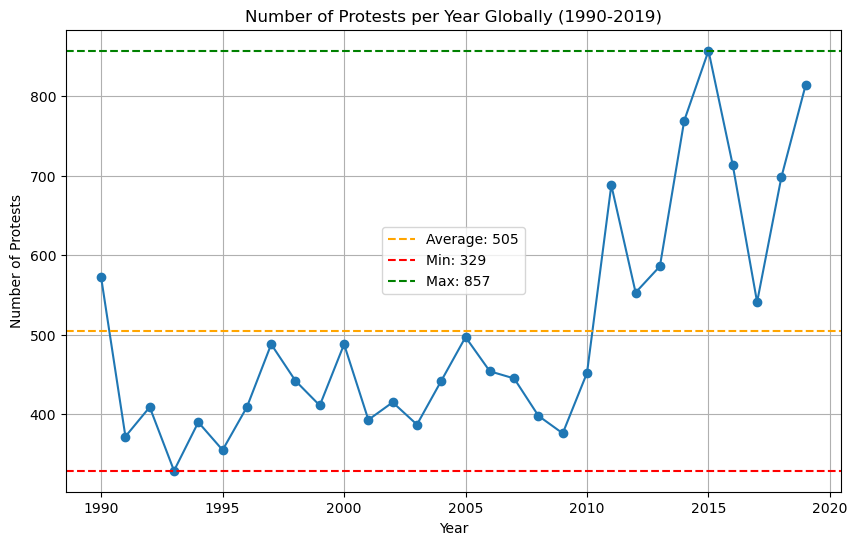

In [ ]:
# Starting by grouping the data by year (Source: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/).
yeargrouped = massmob_df.groupby('year')
# We then want to get the number of protests for each group by counting the rows.
protests_per_year = yeargrouped.size().reset_index(name='num_protests')
# .size() returns the number of rows in a Pandas series; this places the year as the index, so in order to carry out essential pandas operations later, we need to use .reset_index to transform the series into a Data Frame, with columns for year and number of protests. (Source: https://favtutor.com/articles/convert-pandas-series-to-dataframe/).

plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

avgyearlyprotests = protests_per_year['num_protests'].mean()
minyearlyprotests = protests_per_year['num_protests'].min()
maxyearlyprotests = protests_per_year['num_protests'].max()

plt.axhline(y=avgyearlyprotests, color='orange', linestyle='--', label=f'Average: {avgyearlyprotests:.0f}') # added ":.0f" because a fraction of a protest doesn't make much sense (source: https://www.datacamp.com/tutorial/python-round-to-two-decimal-places)
plt.axhline(y=minyearlyprotests, color='red', linestyle='--', label=f'Min: {minyearlyprotests}')
plt.axhline(y=maxyearlyprotests, color='green', linestyle='--', label=f'Max: {maxyearlyprotests}')

plt.grid()
plt.legend()
plt.show()



The plot above illustrates that the 1990s and 2000s were relatively stable in terms of global sociopolitical movements. However, the 2010s saw a dramatic rise in protests, coinciding with major events such as the Arab Spring and the surge in climate-related demonstrations in the West. The year with the fewest recorded protests was 1993, with 329 events, while 2015 stands out as a peak year of mass mobilisation, with 857 protests globally. From 1990 to 2019, the average annual number of protests was 505. However, this figure is significantly influenced by the high activity of the 2010s, as yearly protest counts only surpassed this average once prior to 2011. Interestingly, that exception was 1990, a year marked by the dissolution of the USSR and the fall of communism in Europe, which triggered widespread protests.

## Linear Regression: Where is the data trending?

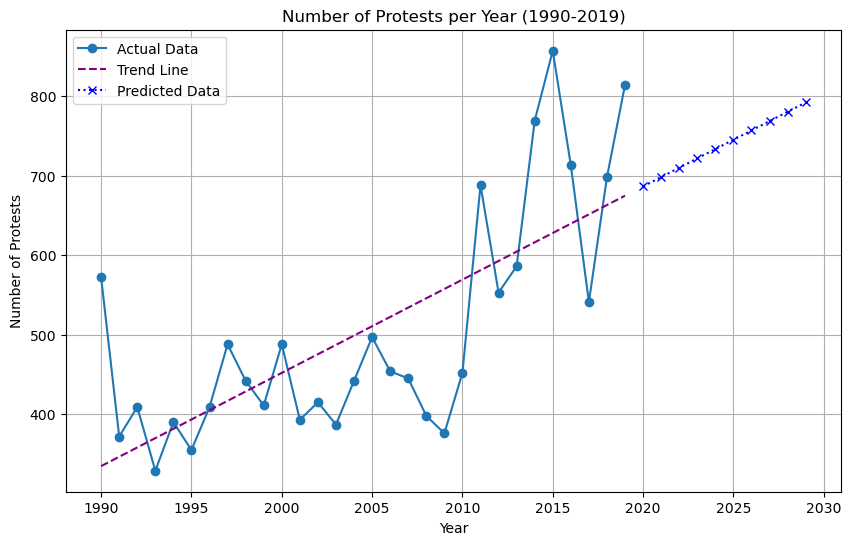

There is an upward trend with a slope of 11.72.


In [154]:
# Note: This code sample was adapted from https://www.kaggle.com/code/nargisbegum82/step-by-step-ml-linear-regression

from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
x = protests_per_year['year'].values.reshape(-1, 1)  
y = protests_per_year['num_protests'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]

# Predict for the next 10 years
future_years = np.arange(2020, 2030).reshape(-1, 1)
future_protests = model.predict(future_years)

# Combine predictions with actual data
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o', label='Actual Data')
plt.plot(protests_per_year['year'], model.predict(X), color='purple', linestyle='--', label='Trend Line')
plt.plot(future_years, future_protests, marker='x', linestyle=':', color='blue', label='Predicted Data')
plt.title('Number of Protests per Year (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.grid()
plt.legend()
plt.show()

# Display the trend
if slope > 0:
    print(f"There is an upward trend with a slope of {slope:.2f}.")
else:
    print(f"There is no upward trend (slope = {slope:.2f}).")

Using linear regression analysis, we can project an upward trend in the number of protests, with an estimated 791 protests globally in 2029. This prediction is based on historical data from 1990 to 2019, where we observe a steady increase in protest activity, particularly in the 2010s. While linear regression provides a simple and effective way to analyze trends and make predictions, it may not be the most reliable tool for forecasting sociopolitical events.

Sociopolitical phenomena are influenced by complex and unpredictable factors, such as geopolitical shifts, economic crises, policy changes, and cultural movements, which cannot be fully captured by a linear model. For instance, sudden global events like pandemics or wars can dramatically disrupt trends, making historical data a poor predictor of future activity. Additionally, the rise in protests during certain periods, such as the Arab Spring or climate protests, often results from unique, non-linear dynamics that are difficult to quantify using regression analysis.

Therefore, while the analysis suggests an upward trajectory, caution is needed when interpreting these results, as they do not account for the underlying complexities and uncertainties of real-world events. Complementing regression analysis with qualitative research or more sophisticated models could provide a more nuanced understanding of future protest activity.

## Reasons for Protest
Having looked at the numbers of protests over this period, let's look at the main categories of demands made by protesters and visualise them using a pie chart.

              protesterdemand1  num_protests
0           labor wage dispute          1704
1              land farm issue           466
2             police brutality           817
3  political behavior, process          9614
4  price increases, tax policy          1086
5        removal of politician          1004
6          social restrictions           451


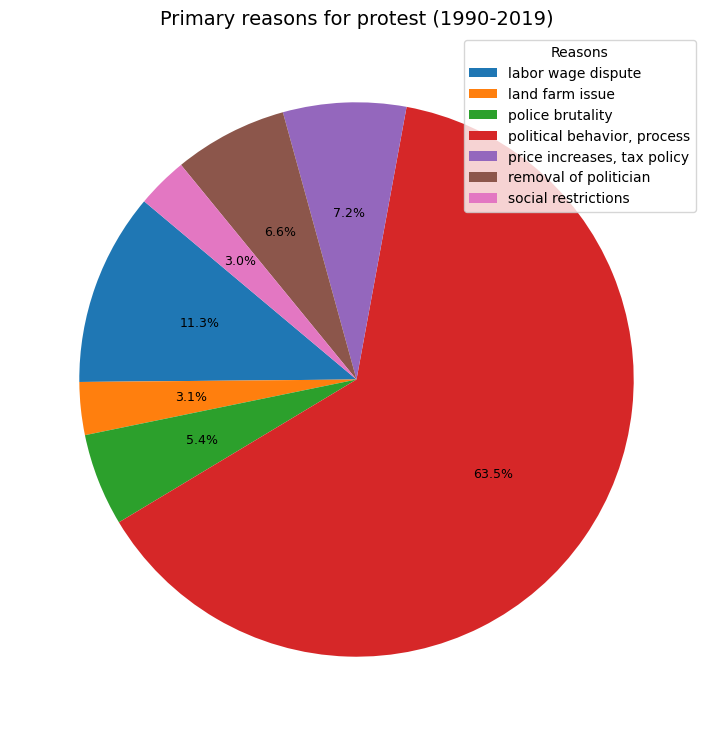

In [22]:
reasongrouped = massmob_df.groupby('protesterdemand1')
protests_by_reason = reasongrouped.size().reset_index(name='num_protests')
print(protests_by_reason)

# Plot pie chart
plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protests_by_reason['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Primary reasons for protest (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_by_reason['protesterdemand1'], title="Reasons", fontsize=10)  # Adjust legend font size
plt.show()

Interestingly, political behavior and process has dominated the reasoning behind protests taking places in the previous 3 decades. Of the other reasons, only Labour/wage disputes reaches 10%.

## Protests per region
Now let's look at how these protests were split from a regional perspective.

            region  num_protests
0           Africa          3164
1             Asia          3099
2  Central America           451
3           Europe          4964
4             MENA          1251
5    North America           520
6          Oceania            38
7    South America          1656


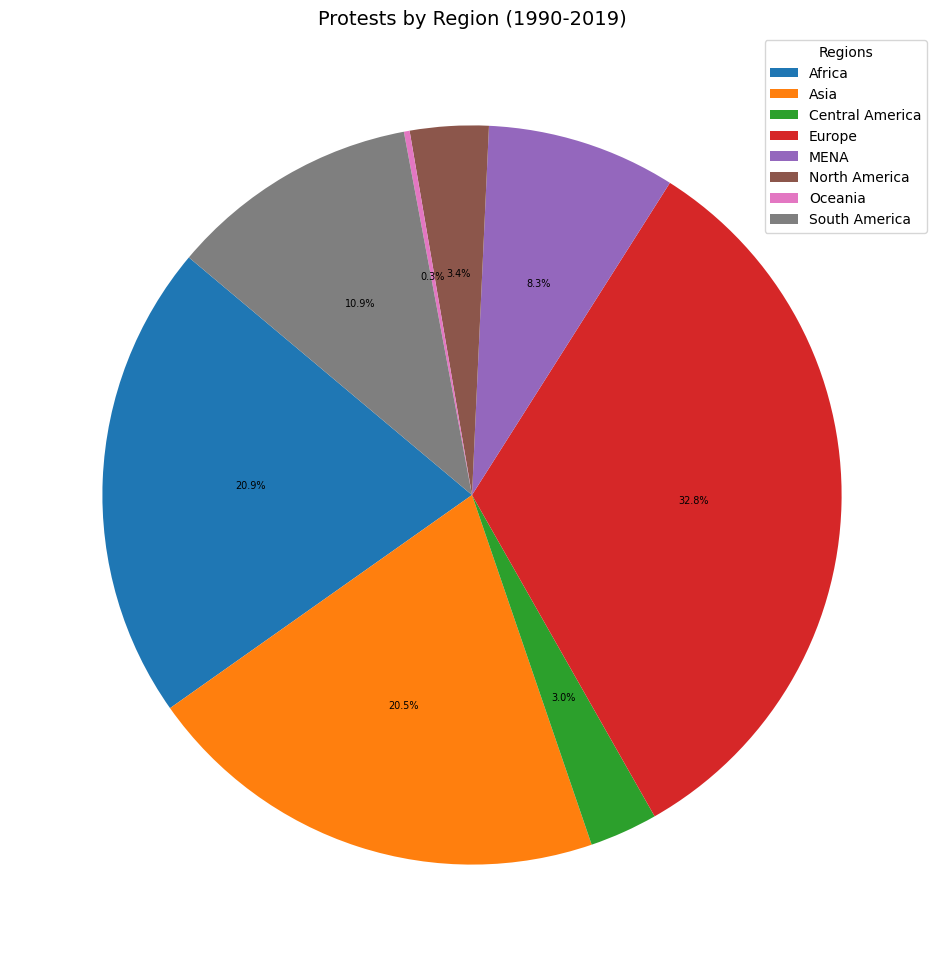

In [27]:
# Group by region and count the number of protests
regiongrouped = massmob_df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)

# Plot pie chart
plt.figure(figsize=(20, 12))
wedges, texts, autotexts = plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 7}  # Adjust font size of labels and percentages
)
plt.title('Protests by Region (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_per_region['region'], title="Regions", fontsize=10)  # Adjust legend font size
plt.show()




As we can see above, Europe had the highest proportion of the protests recorded in these 3 decades, followed respectively by Africa and Asia, with a sizeable proportion also in South America and MENA (Middle East & North Africa).

If we look closer at the data for Europe, we can see which countries were most mobilised. 

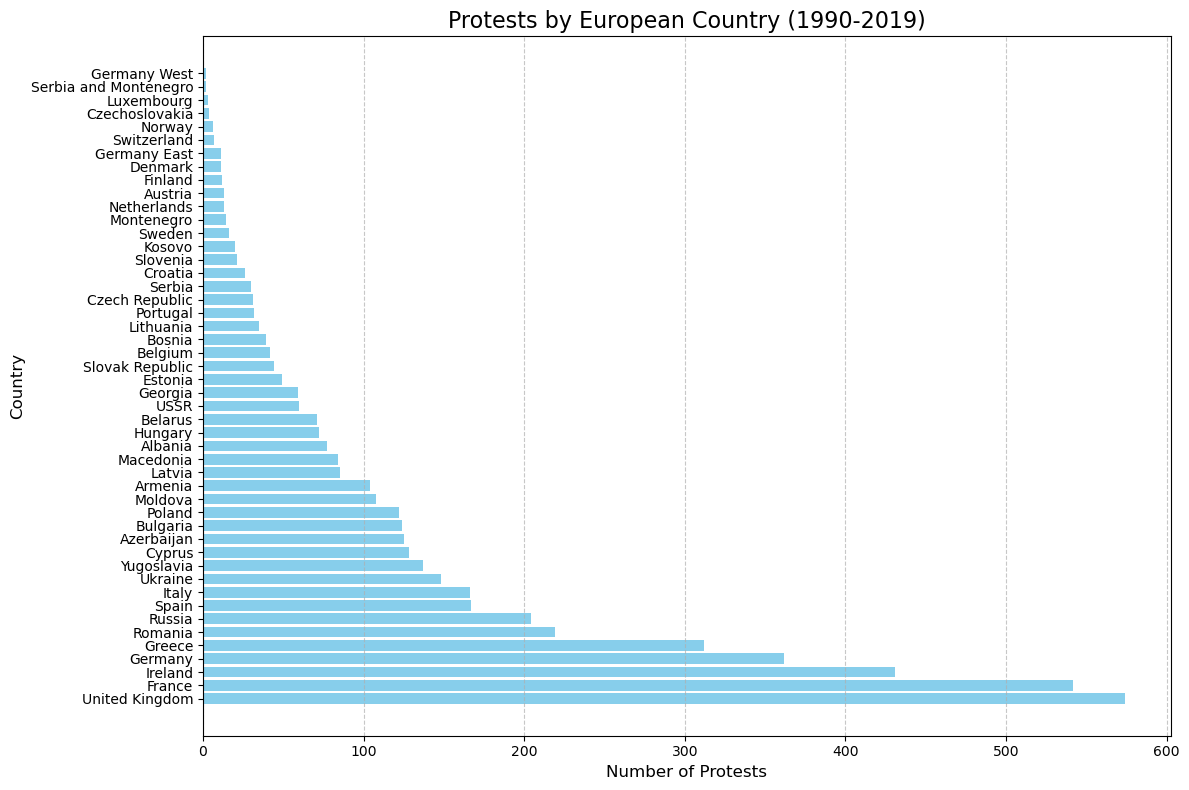

In [19]:
# To do this, I'll filter the data set for just Europe as the region and then group by country. Since the number of countries is quite large, it may be better to show this as a horizontal bar chart.
massmob_df_eu = massmob_df[(massmob_df['region'] == 'Europe')]
europegrouped = massmob_df_eu.groupby('country')
protests_per_country_eu = europegrouped.size().reset_index(name='num_protests')

# Sort the data by the number of protests for better visualization
protests_per_country_eu = protests_per_country_eu.sort_values(by='num_protests', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(protests_per_country_eu['country'], protests_per_country_eu['num_protests'], color='skyblue')

# Add titles and labels
plt.title('Protests by European Country (1990-2019)', fontsize=16)
plt.xlabel('Number of Protests', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate y-axis labels if needed
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


There are a couple of interesting points to take from the data above.

Firstly, it's noticable that there are a number of countries here no longer in existance, such as West Germany, Czechoslovakia, USSR and Yugoslavia, to name a few. If we were to study this data in more depth, we might consider techniques like assigning the data for these countries to their successor countries. This would of course prove difficult though with countries like Yugoslavia, which subsequently split into 7 successor nations.

Secondly, you would expect the number of protests to broadly increase in line with the population of the country - this is true in the sense that United Kingdom, France, and Germany are near the top of the list. However, there are a number of outliers here, with Ireland noticeably standing out, with the 3rd highest number of protests in this period, despite a population dwarfed by the likes of Germany.


Let's now refine our analysis to look at Ireland and see if we can observe any trends.

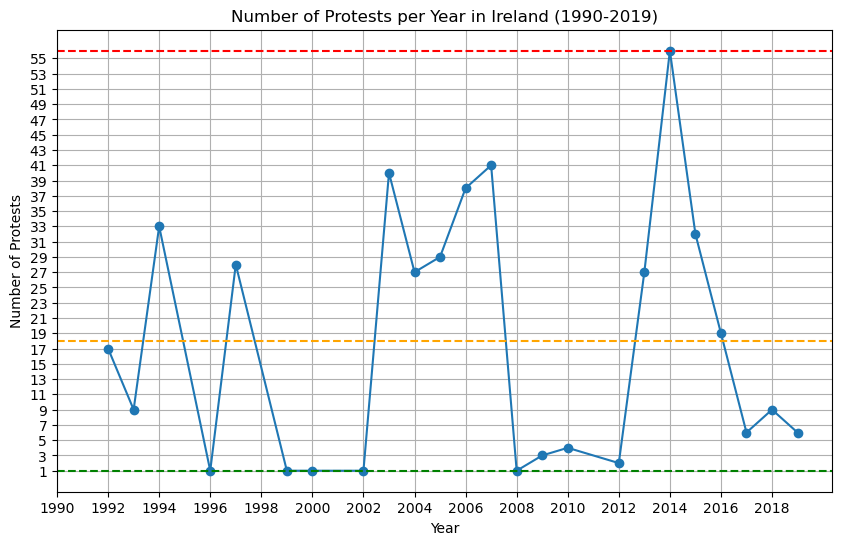

In [14]:
massmob_ie = massmob_df[massmob_df['country'] == 'Ireland']
yeargrouped_ie = massmob_ie.groupby('year')

# Count the number of protests for each year
protests_per_year_ie = yeargrouped_ie.size().reset_index(name='num_protests')

# Calculate average, min, and max
avg_ie = protests_per_year_ie['num_protests'].mean()
min_ie = protests_per_year_ie['num_protests'].min()
max_ie = protests_per_year_ie['num_protests'].max()

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

y_ticks = range(1, int(max_ie) + 1, 2)
plt.yticks(y_ticks)
x_ticks = range(1990, 2019, 2)
plt.xticks(x_ticks)

plt.axhline(y=avg_ie, color='orange', linestyle='--', label=f'Average: {avg_ie:.2f}')
plt.axhline(y=min_ie, color='green', linestyle='--', label=f'Min: {min_ie}')
plt.axhline(y=max_ie, color='red', linestyle='--', label=f'Max: {max_ie}')

plt.grid()
plt.show()

Looking at the data, I'm interested to know why there was such a huge spike in 2014.

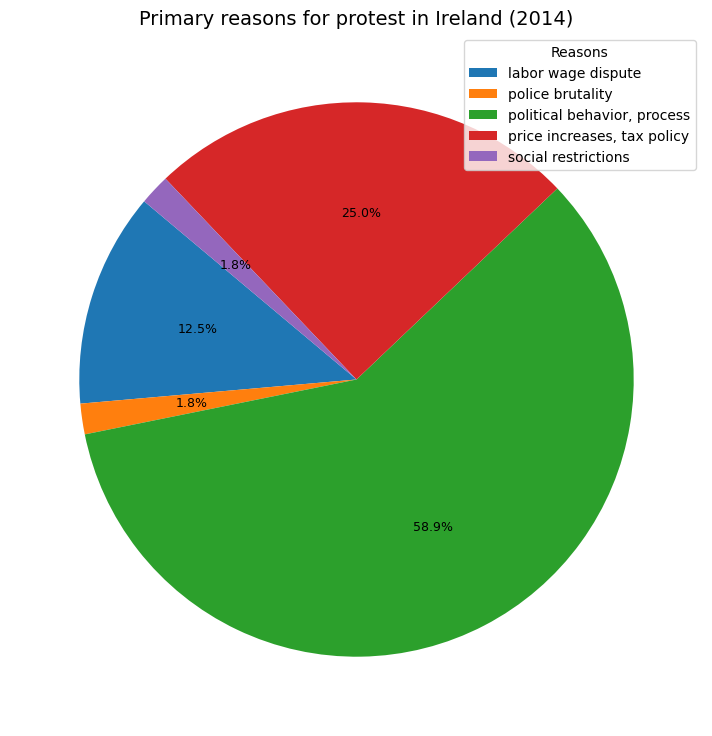

In [15]:
massmob_ie_2014 = massmob_ie[massmob_ie['year'] == 2014]

# Group by Year and Primary Demand, and count the number of protests
protestreasons_ie_2014 = massmob_ie_2014.groupby(['protesterdemand1']).size().reset_index(name='num_protests')

# Plot pie chart
plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protestreasons_ie_2014['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Primary reasons for protest in Ireland (2014)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protestreasons_ie_2014['protesterdemand1'], title="Reasons", fontsize=10)  # Adjust legend font size
plt.show()


## Introducing a second data set: V-Dem Scores

In [122]:
vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.
vdem_df = vdem_df[(vdem_df['year'] >= 1990) & (vdem_df['year'] <= 2019)] # I only wanted to include the years that we also have in the Mass Mobilisation data set.
print(vdem_df.head())
print(vdem_df.columns)


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_11041/1161411086.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.


    country_name country_text_id  country_id  year historical_date  project  \
201       Mexico             MEX           3  1990      1990-12-31        0   
202       Mexico             MEX           3  1991      1991-12-31        0   
203       Mexico             MEX           3  1992      1992-12-31        0   
204       Mexico             MEX           3  1993      1993-12-31        0   
205       Mexico             MEX           3  1994      1994-12-31        0   

     historical               histname  codingstart  codingend  ...  \
201           1  United Mexican States         1789       2023  ...   
202           1  United Mexican States         1789       2023  ...   
203           1  United Mexican States         1789       2023  ...   
204           1  United Mexican States         1789       2023  ...   
205           1  United Mexican States         1789       2023  ...   

     e_mipopula  e_miurbani  e_pefeliex    e_wb_pop  e_pechmor  e_miinteco  \
201   84913.650     

## Number of Protests vs Liberal Democracy Index (Ireland)
Given that dissatisfaction with political behavior and process was seen as the biggest factor in protests in Ireland in 2014, I'd like to see the correlation between the number of protests and the level of Liberal Democracy.

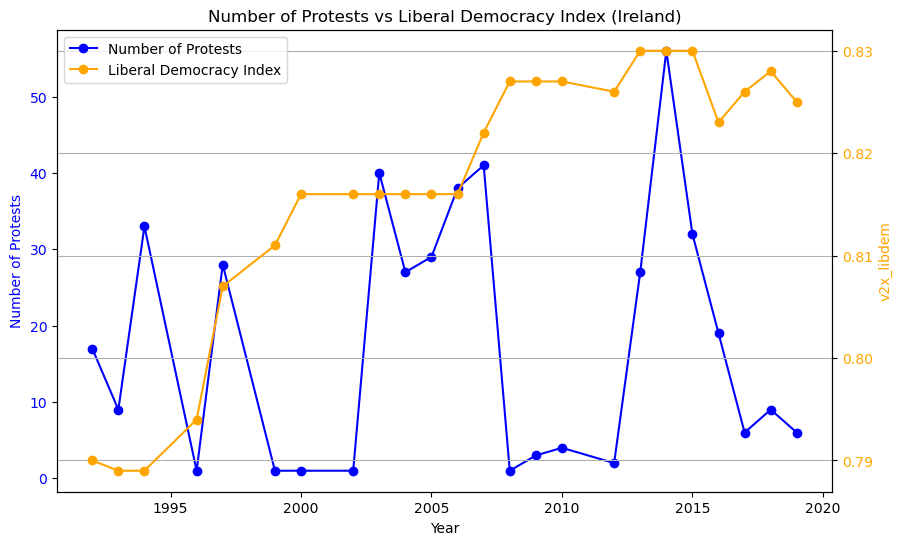

Pearson correlation coefficient: 0.05


In [127]:
vdem_ie = vdem_df[vdem_df['country_name'] == 'Ireland']
vdem_libdem_ie = vdem_ie[['year', 'v2x_libdem']]

massmob_ie_2014 = massmob_ie[massmob_ie['year'] == 2014]

# Merge datasets on 'year'
merged_df = pd.merge(protests_per_year_ie, vdem_libdem_ie, on='year', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of protests (primary y-axis)
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='blue',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for v2x_libdem
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='orange',
    marker='o',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('v2x_libdem', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Number of Protests vs Liberal Democracy Index (Ireland)')
plt.grid()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.show()

correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])
print(f"Pearson correlation coefficient: {correlation:.2f}")




Looking at the Pearson correlation coefficient of +0.05, there is little to no correlation between the number of protests and the Liberal Democracy Index in Ireland; however, the year with the highest number of protests does align with the year with the highest liberal democracy index, perhaps suggesting that people felt empowered in that period to make change.

With a country like Ireland, which is relatively stable, we might not expect to see huge changes in the liberal democracy index. Let's look instead at a country that has gone through more turmoil in the last 30 years; Turkey. As Turkey's president Erdoğan has become increasingly authoritarian over the last 20 year, we would expect the Liberal Democracy index to plummet. Let's see the effect this has had on protest numbers.


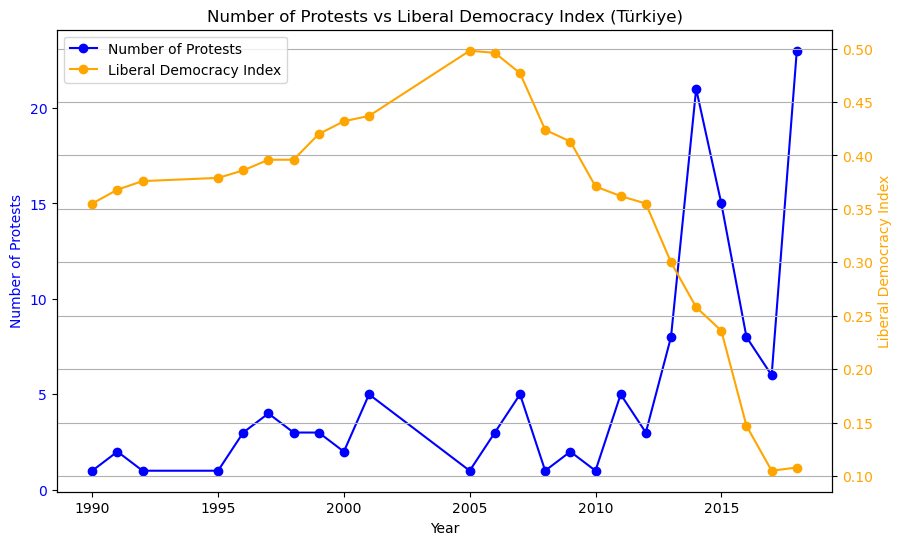

Pearson correlation coefficient: -0.68


In [142]:
massmob_tr = massmob_df[massmob_df['country'] == 'Turkey']
yeargrouped_tr = massmob_tr.groupby('year')

# Count the number of protests for each year
protests_per_year_tr = yeargrouped_tr.size().reset_index(name='num_protests')

vdem_tr = vdem_df[vdem_df['country_name'] == 'Türkiye']
vdem_libdem_tr = vdem_tr[['year', 'v2x_libdem']]

# Merge datasets on 'year'
merged_df = pd.merge(protests_per_year_tr, vdem_libdem_tr, on='year', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of protests (primary y-axis)
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='blue',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for v2x_libdem
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='orange',
    marker='o',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('Liberal Democracy Index', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Number of Protests vs Liberal Democracy Index (Türkiye)')
plt.grid()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.show()

correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

As we can see above, there is a relatively strong negative correlation between the number of protests and the level of liberal democracy. In other words, as Turkey has become less democratic, the number of protests has, on average, increased in line with this. This indicates a backlash amongst the people in response to the country's fraying electoral and judicial institutions.

## Number of Protests vs Freedom of Expression

I now want to look at the correlation between number of protests per country and its average Freedom of Expression score.
For this, I wanted a sample of countries that would be relatively equal in population and with a fair geographical distribution, so I asked ChatGPT for a list of 20 countries with populations within a narrow range, where the difference between the highest and lowest population was less than 10 million, and where the countries were well distributed geographically. The countries it returned all have a population of 25-35 million.

In [108]:
samplecountries = ['Peru','Venezuela','Morocco','Ghana','Angola','Uzbekistan','Iraq','Saudi Arabia','Nepal','Malaysia','Mozambique','Yemen','South Korea','Ukraine','Colombia','Tanzania','North Korea','Kenya','Argentina','Algeria']

# Filter the datasets for the sample countries
protests_sample = massmob_df[massmob_df['country'].isin(samplecountries)]
vdem_samplecountries = vdem_df[vdem_df['country_name'].isin(samplecountries)]

total_protests_sample = protests_sample.groupby('country').size().reset_index(name='total_protests')
avg_freexp_sample = vdem_samplecountries.groupby('country_name')['v2x_freexp'].mean().reset_index(name='avg_freedom_of_expression')

# Standardize column names for merging
total_protests_sample.rename(columns={'country': 'country_name'}, inplace=True)

# Merge the two datasets
combined_sample = pd.merge(total_protests_sample, avg_freexp_sample, on='country_name')

print(combined_sample)



    country_name  total_protests  avg_freedom_of_expression
0        Algeria             105                   0.581367
1         Angola              24                   0.370600
2      Argentina             114                   0.922333
3       Colombia             139                   0.731867
4          Ghana              66                   0.833633
5           Iraq             123                   0.283433
6          Kenya             350                   0.691300
7       Malaysia             147                   0.396367
8        Morocco              40                   0.454667
9     Mozambique              75                   0.688367
10         Nepal             213                   0.811467
11   North Korea               8                   0.012667
12          Peru             166                   0.729200
13  Saudi Arabia              21                   0.122433
14   South Korea             345                   0.877267
15      Tanzania              37        

Now let's use Numpy's polyfit to plot this data and work out the correlation between protest numbers and average freedom of expression scores.

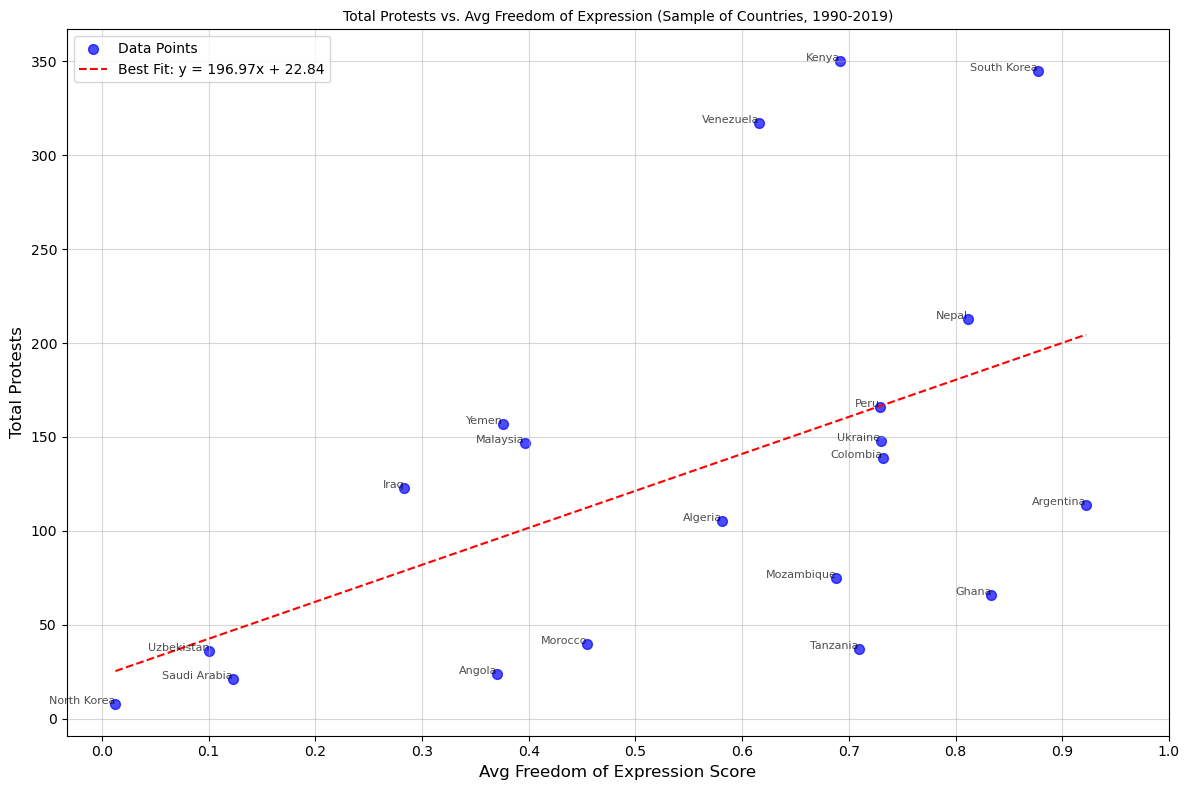

Pearson correlation coefficient: 0.5078381427393297


In [112]:

# Extract x and y values from combined_sample
x = combined_sample['avg_freedom_of_expression']
y = combined_sample['total_protests']

# Fit a linear regression line using NumPy's polyfit
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Generate y values for the line of best fit
x_line = np.linspace(x.min(), x.max(), 100)
y_line = line(x_line)

# Plot the scatter plot and the line of best fit
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Data Points', s=50, alpha=0.7)

# Plot the line of best fit
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Best Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add country names as labels on the scatter plot
for i, row in combined_sample.iterrows():
    plt.text(row['avg_freedom_of_expression'], row['total_protests'], row['country_name'], fontsize=8, ha='right', alpha=0.7)

# Titles, labels, and legend
plt.title('Total Protests vs. Avg Freedom of Expression (Sample of Countries, 1990-2019)', fontsize=10)
plt.xlabel('Avg Freedom of Expression Score', fontsize=12)
plt.ylabel('Total Protests', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient
corr = x.corr(y)
print(f"Pearson correlation coefficient: {corr}")


With a Pearson correlation coefficient of 0.51, we can establish that there is a moderate correlation between a country's freedom of expression score and the number of protests they experience. Freedom of Expression is notoriously limited in North Korea, and the low number of protests reflects this. Its Southern neighbour, South Korea, on the other hand, has a relatively high freedom of expression score, and its large number of protests reflects the ability of citizens to make their voices heard. Peru is the closest country in the sample to the best fit line, 